# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import Function

In [ ]:
def plot_stock_data(df, title):
    plt.figure(figsize=(20, 5))

    # Subplot 1: Harga Open Close saham
    plt.subplot(1, 3, 1)
    plt.plot(df['Date'].values, df.Open.values, color='red', label='Open')
    plt.plot(df['Date'].values, df.Close.values, color='cyan', label='Close')
    plt.xticks(np.arange(100,df.shape[0],200), rotation=20)
    plt.title(f'{title} Open Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')

    # Subplot 1: Harga Low High saham
    plt.subplot(1, 3, 2)
    plt.plot(df['Date'].values, df.Low.values, color='green', label='Low')
    plt.plot(df['Date'].values, df.High.values, color='yellow', label='High')
    plt.xticks(np.arange(100,df.shape[0],200), rotation=20)
    plt.title(f'{title} Low High Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')

    # Subplot 3: Volume saham
    plt.subplot(1, 3, 3)
    plt.plot(df['Date'].values, df.Volume.values, color='black', label='Volume')
    plt.xticks(np.arange(100,df.shape[0],200), rotation=20)
    plt.title(f'{title} Stock Volume')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend(loc='best')

    plt.show()

# Reading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pth = '/content/drive/MyDrive/Skripsi/dataset/'

## ADRO

In [ ]:
adro = pd.read_csv(pth + 'PT Adaro Energy Indonesia Tbk_2020-2024.csv')
adro.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,1555.0,1555.0,1490.0,1495.0,835.632202,76612000
1,2020-01-03,1460.0,1470.0,1425.0,1465.0,856.372375,117795600
2,2020-01-06,1455.0,1515.0,1450.0,1465.0,856.372375,61423200
3,2020-01-07,1480.0,1540.0,1460.0,1540.0,900.213867,74336500
4,2020-01-08,1530.0,1535.0,1505.0,1505.0,879.754395,55121100


In [ ]:
adro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1148 non-null   object 
 1   Open       1148 non-null   float64
 2   High       1148 non-null   float64
 3   Low        1148 non-null   float64
 4   Close      1148 non-null   float64
 5   Adj Close  1148 non-null   float64
 6   Volume     1148 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 62.9+ KB


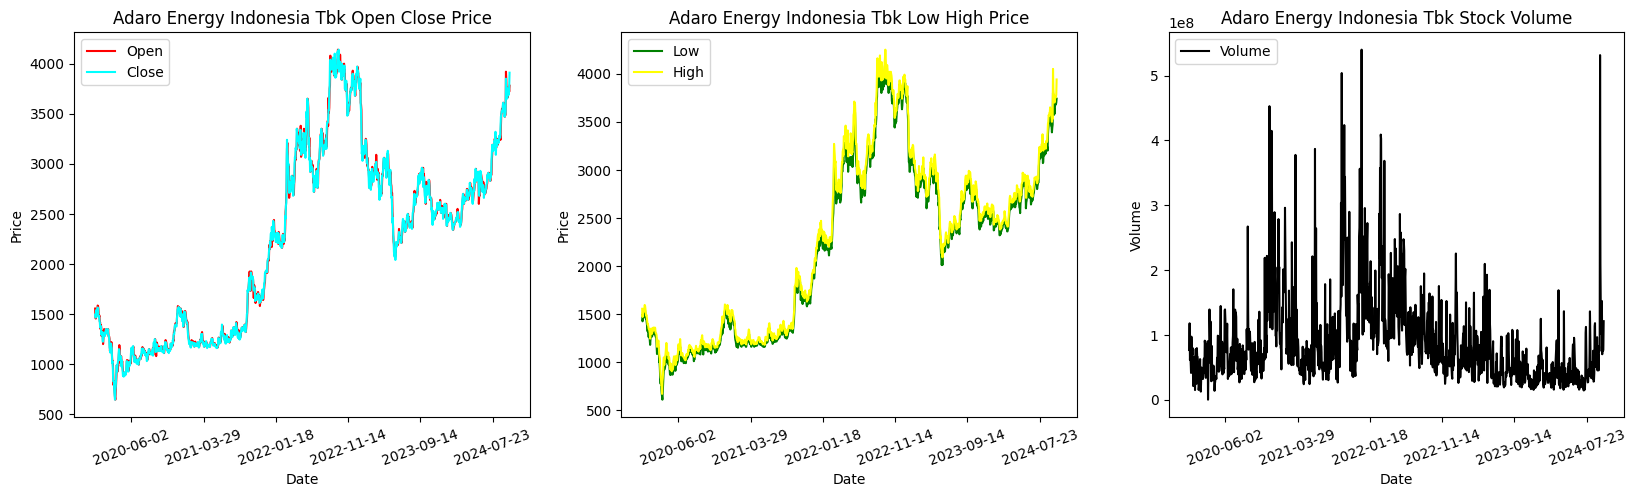

In [ ]:
plot_stock_data(adro, "Adaro Energy Indonesia Tbk")

## DSSA

In [ ]:
dssa = pd.read_csv(pth + 'PT Dian Swastatika Sentosa Tbk_2020-2024.csv')
dssa.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,1360.0,1435.0,1360.0,1435.0,1435.0,5000
1,2020-01-03,1435.0,1435.0,1435.0,1435.0,1435.0,0
2,2020-01-06,1437.5,1437.5,1435.0,1435.0,1435.0,3000
3,2020-01-07,1435.0,1435.0,1435.0,1435.0,1435.0,0
4,2020-01-08,1435.0,1435.0,1435.0,1435.0,1435.0,0


In [ ]:
dssa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1148 non-null   object 
 1   Open       1148 non-null   float64
 2   High       1148 non-null   float64
 3   Low        1148 non-null   float64
 4   Close      1148 non-null   float64
 5   Adj Close  1148 non-null   float64
 6   Volume     1148 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 62.9+ KB


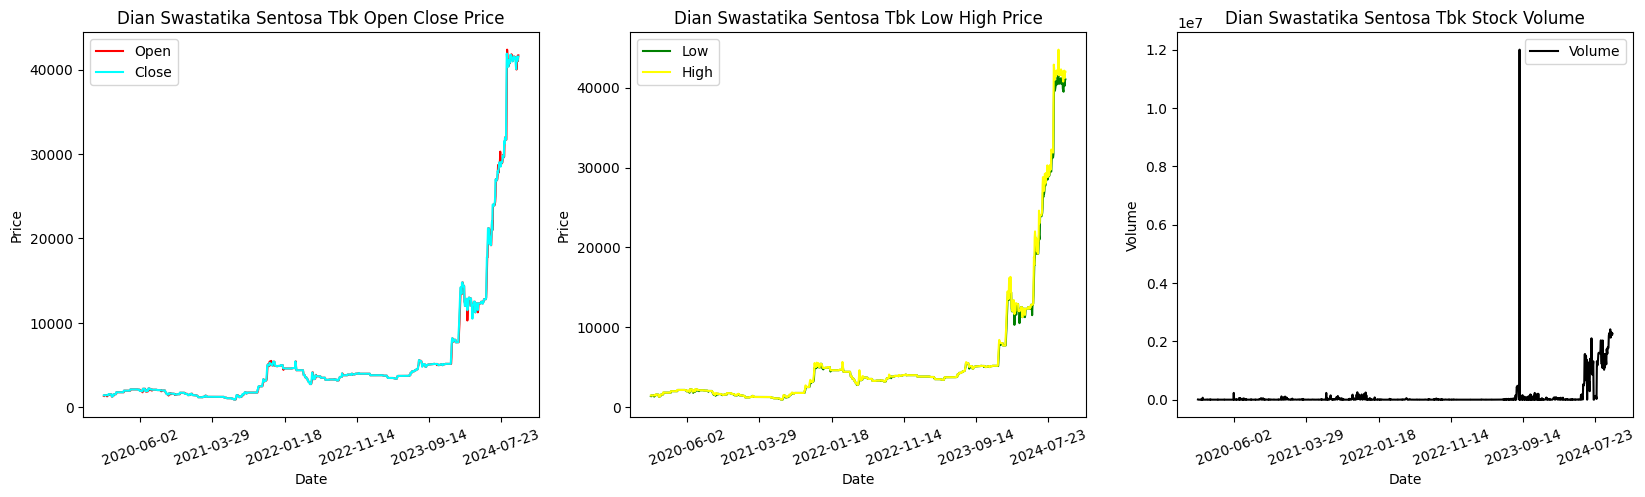

In [ ]:
plot_stock_data(dssa, "Dian Swastatika Sentosa Tbk")

# Pre-processing Data

## Cleaning Dataset

In [ ]:
adro_missing = adro.isnull().sum()
dssa_missing = dssa.isnull().sum()

print("Missing values in ADRO:")
print(adro_missing)
print("\nMissing values in DSSA:")
print(dssa_missing)

Missing values in ADRO:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values in DSSA:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## Normalisasi Data

*   Normalisasi data pake MinMaxScaler
*   Kolom Date Ga dipake

In [ ]:
scaler = MinMaxScaler()

In [ ]:
def normalize_data(df):
    scaled_df = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:], index=df.index)
    return scaled_df

In [ ]:
adro_norm = adro.copy()
adro_norm = normalize_data(adro_norm)

In [ ]:
dssa_norm = dssa.copy()
dssa_norm = normalize_data(dssa_norm)

# Data Mining

## Pembagian Data

In [ ]:
def split_data(df, test_size=0.2):
    train, test = train_test_split(df, test_size=test_size, shuffle=False)
    return train, test

In [ ]:
adro_train, adro_test = split_data(adro_norm)
print('adro_train.shape = ', adro_train.shape)
print('adro_test.shape = ', adro_test.shape)

adro_train.shape =  (918, 6)
adro_test.shape =  (230, 6)


In [ ]:
dssa_train, dssa_test = split_data(dssa_norm)
print('dssa_train.shape = ', dssa_train.shape)
print('dssa_test.shape = ', dssa_test.shape)

dssa_train.shape =  (918, 6)
dssa_test.shape =  (230, 6)


### "High" Attribute

Dipilih atribut "high" sebagai target prediksi

In [ ]:
def target_plot(df):
    df["High"][:918].plot(figsize=(16,4),legend=True)
    df["High"][918:].plot(figsize=(16,4),legend=True)
    plt.legend(['Training set','Test set'])
    plt.title('IBM stock price')
    plt.show()

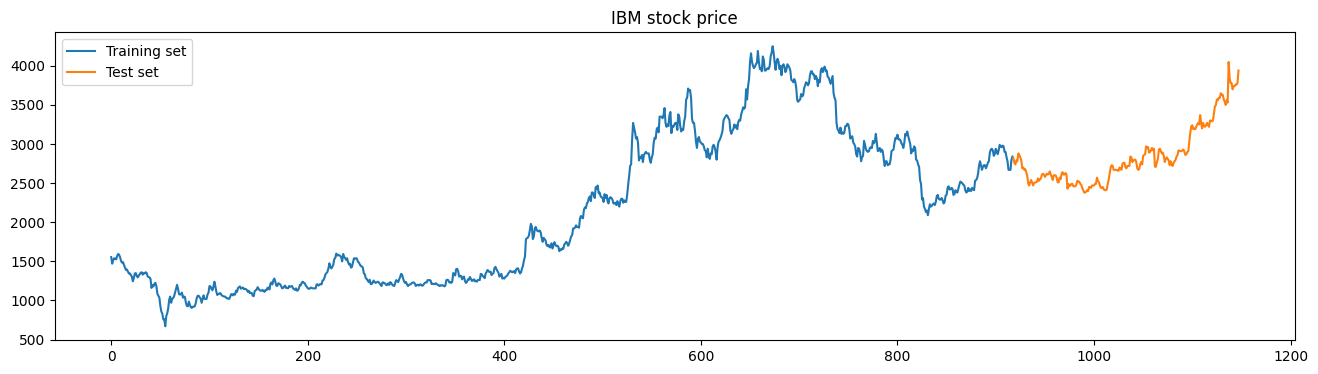

In [ ]:
target_plot(adro)

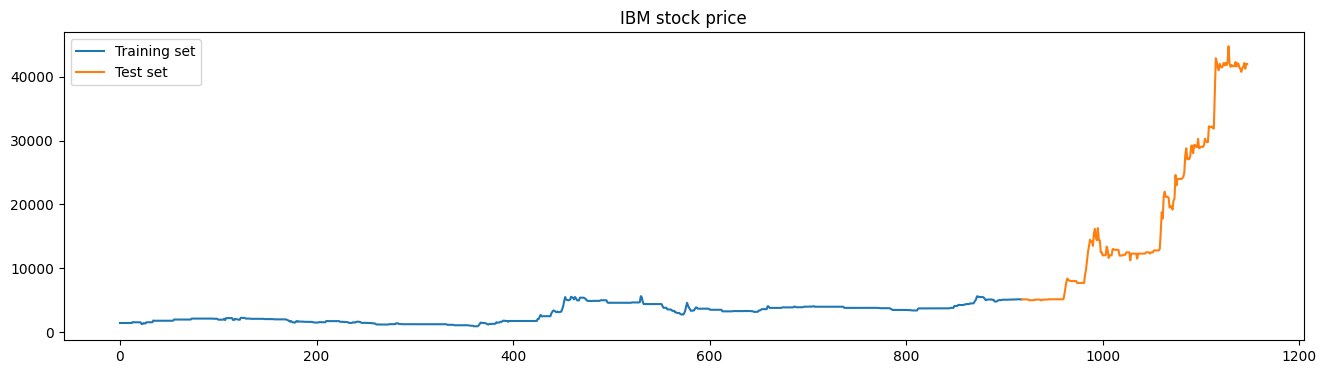

In [ ]:
target_plot(dssa)

## Prepare Data for LSTM

In [ ]:
adro_train.shape

(918, 6)

Memastikan data memiliki format yang sesuai untuk LSTM (3D tensor).

* samples = jumlah data (baris pertama)
* timesteps = jumlah langkah waktu sebelumnya
* features = jumlah fitur per timestep (misalnya 1 jika hanya ada satu kolom)

Menambahkan dimensi fitur (1) agar bisa digunakan dalam model deep learning.

In [ ]:
def prepare_data_LSTM(df):
    X_train = []
    y_train = []

    # Pastikan df adalah dataframe atau array dengan kolom yang benar
    for i in range(60, 918):  # Data dimulai dari indeks ke-60
        X_train.append(df.iloc[i-60:i, 0].values)  # Mengambil 60 nilai sebelumnya untuk X
        y_train.append(df.iloc[i, 0])  # Mengambil nilai target pada indeks ke-i untuk y

    # Mengubah X_train dan y_train menjadi array
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshape X_train untuk LSTM: (samples, timesteps, features)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    return X_train, y_train

In [ ]:
adro_x_train, adro_y_train = prepare_data_LSTM(adro_train)

In [ ]:
adro_x_train.shape

(858, 60, 1)

In [ ]:
adro_y_train.shape

(858,)

In [ ]:
dssa_x_train, dssa_y_train = prepare_data_LSTM(dssa_train)

In [ ]:
dssa_x_train.shape

(858, 60, 1)

In [ ]:
dssa_y_train.shape

(858,)

# LSTM

In [ ]:
def create_lstm_model(input_shape):

    # Membangun model LSTM yang lebih kompleks
    model = Sequential()

    # LSTM Layer 1 (Input Layer)
    model.add(LSTM(units=100, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))  # Dropout lebih tinggi untuk menghindari overfitting

    # LSTM Layer 2
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.3))

    # LSTM Layer 3
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.3))

    # LSTM Layer 4 (Terakhir)
    model.add(LSTM(units=100))
    model.add(Dropout(0.3))

    # Fully Connected Layer (Dense)
    model.add(Dense(units=50, activation='relu'))  # Lapisan tambahan untuk meningkatkan performa
    model.add(Dense(units=25, activation='relu'))
    model.add(Dense(units=1))  # Output layer (1 nilai: harga saham)
    return model

In [ ]:
# Create and compile the model
input_shape = (adro_x_train.shape[1], 1)
model = create_lstm_model(input_shape)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 288,351 (1.10 MB)

 Trainable params: 288,351 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

## ADRO

### Train the model

In [ ]:
model.fit(adro_x_train, adro_y_train, epochs=50, batch_size=32) # Adjust epochs and batch_size as needed

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 223ms/step - loss: 0.0969
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - loss: 0.0087
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - loss: 0.0061
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - loss: 0.0056
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 243ms/step - loss: 0.0071
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - loss: 0.0050
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - loss: 0.0046
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - loss: 0.0049
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - loss: 0.0044
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - loss: 0.0043
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - loss: 0.0042
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - loss: 0.0036
Epoch 13/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - loss: 0.0049
Epoch 14/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - loss: 0.0048
Epoch 15/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step -

### Predict

In [ ]:
adro_test.shape
adro_test

,Open,High,Low,Close,Adj Close,Volume
918,0.616595,0.600559,0.619597,0.605150,0.561383,0.048695
919,0.605150,0.583799,0.599424,0.585122,0.544438,0.076013
920,0.596567,0.578212,0.599424,0.590844,0.549280,0.035117
921,0.602289,0.592179,0.610951,0.610873,0.566224,0.068481
922,0.608011,0.589385,0.616715,0.608011,0.563804,0.042131
...,...,...,...,...,...,...
1143,0.879828,0.857542,0.887608,0.874106,0.940560,0.129755
1144,0.882690,0.863128,0.887608,0.885551,0.951882,0.205913
1145,0.891273,0.863128,0.884726,0.871245,0.937729,0.139641
1146,0.879828,0.868715,0.890490,0.896996,0.963204,0.141757


In [ ]:
def prepare_data_LSTM_test(df):
    X_test = []
    y_test = []

    # Data dimulai dari indeks ke-60 hingga data terakhir yang tersedia
    for i in range(60, len(df)):  # Data dimulai dari indeks ke-60
        X_test.append(df.iloc[i-60:i, 0].values)  # Mengambil 60 nilai sebelumnya untuk X
        y_test.append(df.iloc[i, 0])  # Mengambil nilai target pada indeks ke-i untuk y

    # Mengubah X_test dan y_test menjadi array
    X_test, y_test = np.array(X_test), np.array(y_test)

    # Reshape X_test untuk LSTM: (samples, timesteps, features)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_test, y_test

In [ ]:
adro_x_test, adro_y_test = prepare_data_LSTM_test(adro_test)

In [ ]:
adro_x_test.shape

(170, 60, 1)

In [ ]:
# Prediksi menggunakan model LSTM
y_pred = model.predict(adro_x_test)

# Cek bentuk hasil prediksi
print("Shape of y_pred:", y_pred.shape)  # Seharusnya (jumlah sampel, 1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step
Shape of y_pred: (170, 1)


### Invers Tranformation

In [ ]:
# Mengembalikan prediksi ke skala aslinya (kolom 'High' ada di indeks 2)
predicted_stock_price = scaler.inverse_transform(
    np.concatenate([np.zeros((y_pred.shape[0], 2)), y_pred, np.zeros(
        (y_pred.shape[0], adro_test.shape[1] - 3))], axis=1)
)[:, 2]  # Ambil kolom ketiga (indeks 2)

In [ ]:
actual_stock_price = scaler.inverse_transform(
    np.concatenate([np.zeros((adro_y_test.shape[0], 2)), adro_y_test.reshape(-1, 1), np.zeros(
        (adro_y_test.shape[0], adro_test.shape[1] - 3))], axis=1)
)[:, 2]  # Ambil kolom ketiga (indeks 2)

### Evaluasi

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Menghitung metrik error
mse = mean_squared_error(actual_stock_price, predicted_stock_price)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual_stock_price, predicted_stock_price)
r2 = r2_score(actual_stock_price, predicted_stock_price)

# Menampilkan hasil evaluasi
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 1348171.8052594287
Root Mean Squared Error (RMSE): 1161.1080075769992
Mean Absolute Percentage Error (MAPE): 3.060329185048315
R² Score: 0.9349902540527729


### Perbandingan Harga Asli & Prediksi

In [ ]:
def plot_LSTM(actual_stock_price, predicted_stock_price):
  plt.figure(figsize=(16, 6))
  plt.plot(actual_stock_price, color='blue', label="Actual Stock Price")
  plt.plot(predicted_stock_price, color='red', linestyle='dashed', label="Predicted Stock Price")

  plt.title("Predicted vs Actual Stock Price")
  plt.xlabel("Time")
  plt.ylabel("Stock Price")
  plt.legend()
  plt.show()

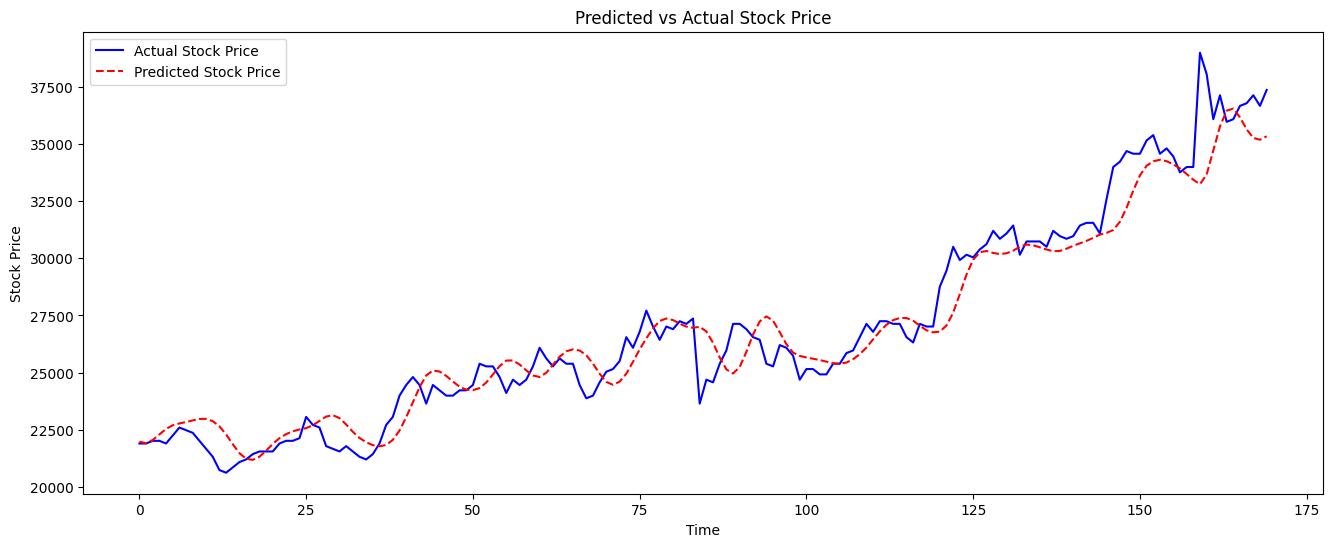

In [ ]:
plot_LSTM(actual_stock_price, predicted_stock_price)

##DSSA

In [ ]:
# Create and compile the model
input_shape = (dssa_x_train.shape[1], 1)
model = create_lstm_model(input_shape)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 288,351 (1.10 MB)

 Trainable params: 288,351 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [ ]:
model.fit(dssa_x_train, dssa_y_train, epochs=50, batch_size=32)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - loss: 0.0019
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - loss: 1.7230e-04
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 230ms/step - loss: 1.0326e-04
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - loss: 8.4525e-05
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - loss: 7.6290e-05
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 8.1790e-05
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 233ms/step - loss: 7.0123e-05
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - loss: 6.0396e-05
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - loss: 5.5220e-05
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - loss: 6.3094e-05
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - loss: 5.8804e-05
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - loss: 6.0372e-05
Epoch 13/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 237ms/step - loss: 5.1679e-05
Epoch 14/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - loss: 4.9749e-05
Epoc

###Predict

In [ ]:
dssa_test.shape
dssa_test

,Open,High,Low,Close,Adj Close,Volume
918,0.101834,0.095998,0.103839,0.102796,0.102796,0.000083
919,0.101834,0.095998,0.103839,0.102796,0.102796,0.000000
920,0.101955,0.096112,0.103962,0.102918,0.102918,0.015000
921,0.101955,0.096112,0.103962,0.102918,0.102918,0.000000
922,0.098697,0.096112,0.100640,0.102918,0.102918,0.012500
...,...,...,...,...,...,...
1143,0.974662,0.927032,0.986467,0.990844,0.990844,0.183483
1144,0.980695,0.940144,0.987082,0.980466,0.980466,0.192608
1145,0.969233,0.919621,0.968012,0.979856,0.979856,0.188600
1146,0.967423,0.936723,0.984621,0.992064,0.992064,0.184558


In [ ]:
dssa_x_test, dssa_y_test = prepare_data_LSTM_test(dssa_test)

In [ ]:
dssa_x_test.shape

(170, 60, 1)

In [ ]:
# Prediksi menggunakan model LSTM
y_pred = model.predict(dssa_x_test)

# Cek bentuk hasil prediksi
print("Shape of y_pred:", y_pred.shape)  # Seharusnya (jumlah sampel, 1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step
Shape of y_pred: (170, 1)


### Invers Transformation

In [ ]:
# Mengembalikan prediksi ke skala aslinya (kolom 'High' ada di indeks 2)
predicted_stock_price = scaler.inverse_transform(
    np.concatenate([np.zeros((y_pred.shape[0], 2)), y_pred, np.zeros(
        (y_pred.shape[0], adro_test.shape[1] - 3))], axis=1)
)[:, 2]  # Ambil kolom ketiga (indeks 2)

In [ ]:
actual_stock_price = scaler.inverse_transform(
    np.concatenate([np.zeros((dssa_y_test.shape[0], 2)), dssa_y_test.reshape(-1, 1), np.zeros(
        (dssa_y_test.shape[0], dssa_test.shape[1] - 3))], axis=1)
)[:, 2]  # Ambil kolom ketiga (indeks 2)

### Evaluasi

In [ ]:
# Menghitung metrik error
mse = mean_squared_error(actual_stock_price, predicted_stock_price)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual_stock_price, predicted_stock_price)
r2 = r2_score(actual_stock_price, predicted_stock_price)

# Menampilkan hasil evaluasi
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 57331990.41578157
Root Mean Squared Error (RMSE): 7571.789115907915
Mean Absolute Percentage Error (MAPE): 21.113281610007427
R² Score: 0.537082137427583


## Perbandingan Harga Asli & Prediksi

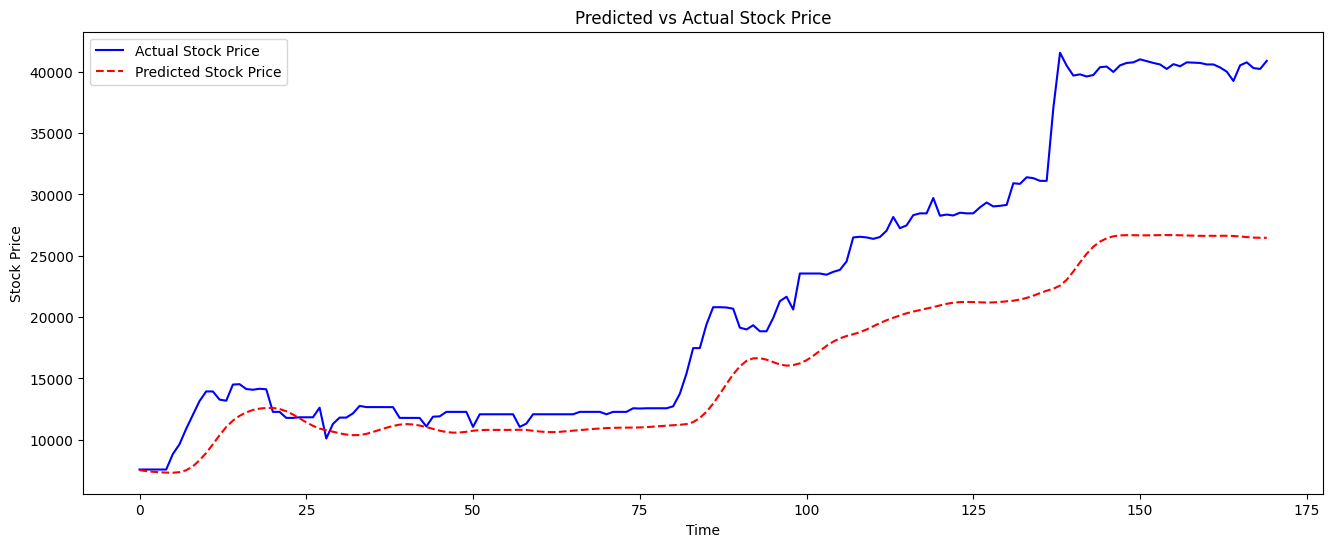

In [ ]:
plot_LSTM(actual_stock_price, predicted_stock_price)